# Introduction to Logistic Regression

## Motivation

Logistic regression is like linear regression except for binary, categorical predicted variables instead of quantitative variables.


In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
import random


## Load the data
This data is of data scientists at a certain company. Each data scientist has a number of years of experience, a salary, and whether they paid for a premium subscription to a data science social networking website.

,experience,salary,premium
0,0.7,48000,1
1,1.9,48000,0
2,2.5,60000,1
3,4.2,63000,0
4,6.0,76000,0


Text(0, 0.5, 'subscribe')

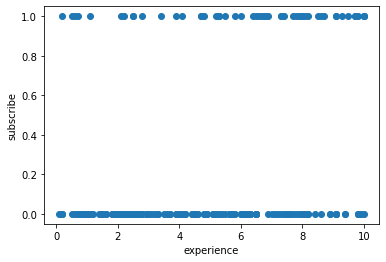

In [2]:
data = [(0.7,48000,1),(1.9,48000,0),(2.5,60000,1),(4.2,63000,0),(6,76000,0),(6.5,69000,0),(7.5,76000,0),(8.1,88000,0),(8.7,83000,1),(10,83000,1),(0.8,43000,0),(1.8,60000,0),(10,79000,1),(6.1,76000,0),(1.4,50000,0),(9.1,92000,0),(5.8,75000,0),(5.2,69000,0),(1,56000,0),(6,67000,0),(4.9,74000,0),(6.4,63000,1),(6.2,82000,0),(3.3,58000,0),(9.3,90000,1),(5.5,57000,1),(9.1,102000,0),(2.4,54000,0),(8.2,65000,1),(5.3,82000,0),(9.8,107000,0),(1.8,64000,0),(0.6,46000,1),(0.8,48000,0),(8.6,84000,1),(0.6,45000,0),(0.5,30000,1),(7.3,89000,0),(2.5,48000,1),(5.6,76000,0),(7.4,77000,0),(2.7,56000,0),(0.7,48000,0),(1.2,42000,0),(0.2,32000,1),(4.7,56000,1),(2.8,44000,1),(7.6,78000,0),(1.1,63000,0),(8,79000,1),(2.7,56000,0),(6,52000,1),(4.6,56000,0),(2.5,51000,0),(5.7,71000,0),(2.9,65000,0),(1.1,33000,1),(3,62000,0),(4,71000,0),(2.4,61000,0),(7.5,75000,0),(9.7,81000,1),(3.2,62000,0),(7.9,88000,0),(4.7,44000,1),(2.5,55000,0),(1.6,41000,0),(6.7,64000,1),(6.9,66000,1),(7.9,78000,1),(8.1,102000,0),(5.3,48000,1),(8.5,66000,1),(0.2,56000,0),(6,69000,0),(7.5,77000,0),(8,86000,0),(4.4,68000,0),(4.9,75000,0),(1.5,60000,0),(2.2,50000,0),(3.4,49000,1),(4.2,70000,0),(7.7,98000,0),(8.2,85000,0),(5.4,88000,0),(0.1,46000,0),(1.5,37000,0),(6.3,86000,0),(3.7,57000,0),(8.4,85000,0),(2,42000,0),(5.8,69000,1),(2.7,64000,0),(3.1,63000,0),(1.9,48000,0),(10,72000,1),(0.2,45000,0),(8.6,95000,0),(1.5,64000,0),(9.8,95000,0),(5.3,65000,0),(7.5,80000,0),(9.9,91000,0),(9.7,50000,1),(2.8,68000,0),(3.6,58000,0),(3.9,74000,0),(4.4,76000,0),(2.5,49000,0),(7.2,81000,0),(5.2,60000,1),(2.4,62000,0),(8.9,94000,0),(2.4,63000,0),(6.8,69000,1),(6.5,77000,0),(7,86000,0),(9.4,94000,0),(7.8,72000,1),(0.2,53000,0),(10,97000,0),(5.5,65000,0),(7.7,71000,1),(8.1,66000,1),(9.8,91000,0),(8,84000,0),(2.7,55000,0),(2.8,62000,0),(9.4,79000,0),(2.5,57000,0),(7.4,70000,1),(2.1,47000,0),(5.3,62000,1),(6.3,79000,0),(6.8,58000,1),(5.7,80000,0),(2.2,61000,0),(4.8,62000,0),(3.7,64000,0),(4.1,85000,0),(2.3,51000,0),(3.5,58000,0),(0.9,43000,0),(0.9,54000,0),(4.5,74000,0),(6.5,55000,1),(4.1,41000,1),(7.1,73000,0),(1.1,66000,0),(9.1,81000,1),(8,69000,1),(7.3,72000,1),(3.3,50000,0),(3.9,58000,0),(2.6,49000,0),(1.6,78000,0),(0.7,56000,0),(2.1,36000,1),(7.5,90000,0),(4.8,59000,1),(8.9,95000,0),(6.2,72000,0),(6.3,63000,0),(9.1,100000,0),(7.3,61000,1),(5.6,74000,0),(0.5,66000,0),(1.1,59000,0),(5.1,61000,0),(6.2,70000,0),(6.6,56000,1),(6.3,76000,0),(6.5,78000,0),(5.1,59000,0),(9.5,74000,1),(4.5,64000,0),(2,54000,0),(1,52000,0),(4,69000,0),(6.5,76000,0),(3,60000,0),(4.5,63000,0),(7.8,70000,0),(3.9,60000,1),(0.8,51000,0),(4.2,78000,0),(1.1,54000,0),(6.2,60000,0),(2.9,59000,0),(2.1,52000,0),(8.2,87000,0),(4.8,73000,0),(2.2,42000,1),(9.1,98000,0),(6.5,84000,0),(6.9,73000,0),(5.1,72000,0),(9.1,69000,1),(9.8,79000,1),]
data = list(map(list, data)) # change tuples to lists

df = pd.DataFrame({'experience':[row[0] for row in data],
                   'salary':[row[1] for row in data],
                  'premium':[row[2] for row in data]})
display(df.head())

plt.scatter(df.experience, df.premium)

# Standardize input variables
df.experience = (df.experience - df.experience.mean()) / df.experience.std()
df.salary = (df.salary - df.salary.mean()) / df.salary.std()
plt.xlabel('experience')
plt.ylabel('subscribe')


## Goal
We want to predict whether a given data scientist is going to sign up for a premium subscription to the social networking site. Try linear regression!

In [3]:
df

,experience,salary,premium
0,-1.509461,-1.203582,1
1,-1.088020,-1.203582,0
2,-0.877300,-0.431230,1
3,-0.280258,-0.238142,0
4,0.351903,0.598573,0
...,...,...,...
195,0.527504,1.113474,0
196,0.667984,0.405485,0
197,0.035822,0.341122,0
198,1.440626,0.148034,1


In [4]:
X = df[['experience', 'salary']]
y = df.premium

lm = LinearRegression()
lm.fit(X, y)

print(lm.intercept_)
print(lm.coef_)


0.2599999999999998
[ 0.43886522 -0.42754513]


In [5]:
y_pred = lm.predict(X)

display(X)
display(y_pred)

,experience,salary
0,-1.509461,-1.203582
1,-1.088020,-1.203582
2,-0.877300,-0.431230
3,-0.280258,-0.238142
4,0.351903,0.598573
...,...,...
195,0.527504,1.113474
196,0.667984,0.405485
197,0.035822,0.341122
198,1.440626,0.148034


array([ 1.12135485e-01,  2.97091319e-01,  5.93538584e-02,  2.38820779e-01,
        1.58521204e-01,  4.28211771e-01,  3.89715996e-01,  1.51978536e-01,
        3.82046193e-01,  5.82415013e-01,  2.65138212e-01, -4.85370445e-02,
        6.92486805e-01,  1.73934190e-01,  1.64990492e-01,  1.96036605e-01,
        1.55213180e-01,  2.27842951e-01, -6.17691413e-02,  4.06182737e-01,
        4.40142526e-02,  5.77906474e-01,  2.42394877e-02,  2.37693644e-01,
        2.81898473e-01,  6.04297287e-01, -7.91428759e-02,  2.09048561e-01,
        8.00304328e-01, -1.14477388e-01, -1.08841713e-01, -1.58608837e-01,
        1.51758395e-01,  1.27548471e-01,  3.39115259e-01,  1.79276343e-01,
        5.76632578e-01,  1.15669866e-03,  3.89569235e-01,  9.68692594e-02,
        3.46785062e-01,  2.00251623e-01,  1.12135485e-01,  3.54308104e-01,
        4.75357724e-01,  5.08511346e-01,  5.45879986e-01,  3.50093086e-01,
       -2.38981792e-01,  3.84227082e-01,  2.00251623e-01,  8.18951958e-01,
        4.93098360e-01,  

Text(0.5, 1.0, 'color is actual value')

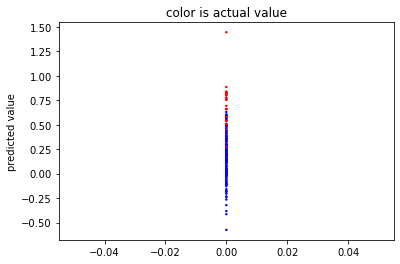

In [6]:
# look at what values were predicted. Position on the y-axis is predicted
# value and color is the actual value.
plt.figure()
plt.scatter([0 for _ in y_pred], y_pred, c=y, cmap='bwr', s=2)
plt.ylabel('predicted value')
plt.title('color is actual value')

'cutoff: 0.3'

'precision = [0.95798319 0.58024691]'

'recall = [0.77027027 0.90384615]'

'f-score = [0.85393258 0.70676692]'

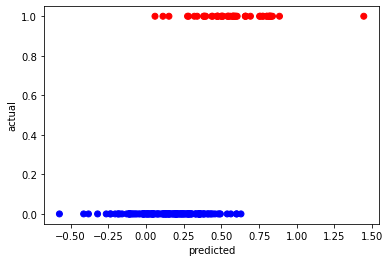

In [7]:
# look at what was predicted against the actual values
plt.figure()
plt.scatter(y_pred, y, c=y, cmap='bwr')
plt.xlabel('predicted')
plt.ylabel('actual')

# display('predicted range: [{0:.2f},{1:.2f}]'.format(min(y_pred), max(y_pred)))

# # Set the cutoff to, say, 0
# p,r,f,s = precision_recall_fscore_support(y, [0 if y_<0 else 1 for y_ in y_pred])
# display('cutoff: 0.0')
# display('precision = {}'.format(p))
# display('recall = {}'.format(r))
# display('f-score = {}'.format(f))

# Set the cutoff to, say, 0.3
p,r,f,s = precision_recall_fscore_support(y, [0 if y_<0.3 else 1 for y_ in y_pred])
display('cutoff: 0.3')
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

## Predict categorical variable?
How do we take a quantitative predicted value and turn it into a categorical variable? For values between 0 and 1 we could treat them as probabilities:

Text(0, 0.5, 'actual')

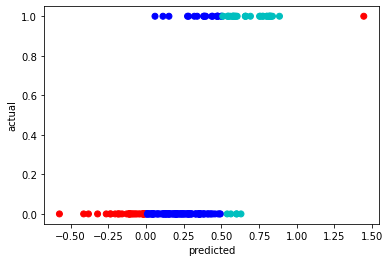

In [8]:
def get_color(x):
    if x < 0 or x > 1:
        return 'r'
    if x < 0.5:
        return 'b'
    return 'c'

color = [get_color(x) for x in y_pred]
plt.scatter(y_pred, y, c=color)
plt.xlabel('predicted')
plt.ylabel('actual')


How do we interpret the red predictions, those outside the range of [0,1]?

More importantly is the following problem:

> $\text{premium} = \beta_0 + \beta_1\text{experience} + \beta_2\text{salary} + \epsilon$

Our handy ```lm.fit()``` function finds the coefficients such that $\epsilon$ is minimized. The problem is this: experience is highly correlated with whether the employee will have a premium subscription, so $\beta_2$ is high. So as experience grows, the predicted variable grows as well. However, we know that the maximum value for premium is 1, so that messes with $\epsilon$, throwing our linear fit off!

## The logistic function
The solution is to use the logistic function $f(x)$:

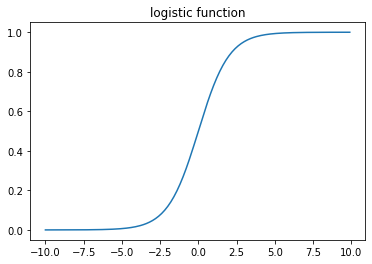

In [9]:
import math

def logistic(x):
    return 1.0 / (1 + math.exp(-x))
#     return 1.0 / (1 + np.exp(-x))

x = [x_/10 for x_ in range(-100,100)]
y = [logistic(x_) for x_ in x]
plt.plot(x, y);
plt.title('logistic function');

Note that as the input goes down the output gets closer to zero, and similarly as it goes up. We can use this to modify our linear regression to use *logistic regression*. So instead of using the linear regression approach of minimizing the error of:

> $\text{premium} = \beta_0 + \beta_1\text{experience} + \beta_2\text{salary} + \epsilon$

logistic regression minimizes the error of (where $f$ is the logistic function):

> $f(\beta_0 + \beta_1\text{experience} + \beta_2\text{salary}) + \epsilon$

We then set premium to zero if $f(x_i\beta)<0$ and one otherwise.

In [10]:
from sklearn.linear_model import LogisticRegression

X = df[['experience', 'salary']]
y = df.premium

lm = LogisticRegression(class_weight={0:0.2, 1:0.8})
lm.fit(X, y)

display(X)
display(y)

,experience,salary
0,-1.509461,-1.203582
1,-1.088020,-1.203582
2,-0.877300,-0.431230
3,-0.280258,-0.238142
4,0.351903,0.598573
...,...,...
195,0.527504,1.113474
196,0.667984,0.405485
197,0.035822,0.341122
198,1.440626,0.148034


0      1
1      0
2      1
3      0
4      0
      ..
195    0
196    0
197    0
198    1
199    1
Name: premium, Length: 200, dtype: int64

In [11]:
# print(lm.intercept_)
# print(lm.coef_)

y_pred = lm.predict(X)

display('predicted range: [{0:.2f},{1:.2f}]'.format(min(y_pred), max(y_pred)))

p,r,f,s = precision_recall_fscore_support(y, y_pred)
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

'predicted range: [0.00,1.00]'

'precision = [0.95726496 0.56626506]'

'recall = [0.75675676 0.90384615]'

'f-score = [0.84528302 0.6962963 ]'

## Prediction
What is prediction doing under the hood? Remember that linear regression was doing the following:

> $\text{premium} = \beta_0 + \beta_1\text{experience} + \beta_2\text{salary}$

Logistic regression does this:

> $a = f(\beta_0 + \beta_1\text{experience} + \beta_2\text{salary})$

> premium = 0 if $a$ < cutoff else 1

where cutoff defaults to 0.5.

## Geometric interpretation
What logistic regression does is finds a separating hyperplane between the data. This hyperplane is defined as
> $\beta_0 + \beta_1\text{experience} + \beta_2\text{salary} = 0$

We also call this separating hyperplane a *decision boundary*.

Text(0, 0.5, 'salary')

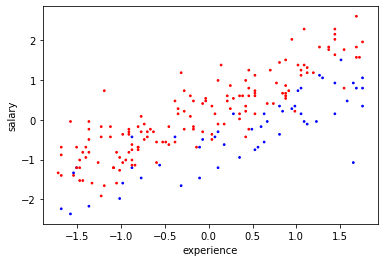

In [12]:
# Plot the dataset colored by actual value
color = ['r' if y_ == 0 else 'b' for y_ in y]
plt.scatter(df.experience, df.salary, c=color, s=3)
plt.xlabel('experience')
plt.ylabel('salary')

# # display(lm.intercept_)
# # display(lm.coef_)

In [13]:
n = 5
experience = [random.uniform(-2,2) for _ in range(n)]
salary = [random.uniform(-2.5,2.5) for _ in range(n)]
df_temp = pd.DataFrame({'experience':experience,'salary':salary})
df_temp
plabel = lm.predict(df_temp)
plabel

array([1, 0, 1, 1, 1])

Text(0, 0.5, 'salary')

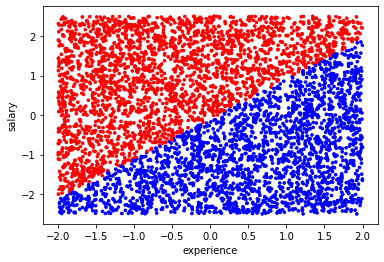

In [14]:
# Plot random points colored by predicted value
b0 = lm.intercept_
b = lm.coef_[0]

# Plot random points colored by prediction
import random

n = 5000
newx = [random.uniform(-2,2) for _ in range(n)]
newy = [random.uniform(-2.5,2.5) for _ in range(n)]
df_temp = pd.DataFrame({'experience':newx,'salary':newy})
newlabel = lm.predict(df_temp)

color = ['r' if y_ == 0 else 'b' for y_ in newlabel]
plt.figure()
plt.scatter(newx, newy, c=color, marker='o', s=7)
plt.xlabel('experience')
plt.ylabel('salary')

## Finding the decision boundary

To find the exact decision boundary we find two points that satisfy this equation.

$\beta_0 + \beta_1\text{experience} + \beta_2\text{salary} = 0$

Set experience and solve for salary:

$\text{salary} = -\frac{\beta_0 + \beta_1\text{experience}}{\beta_2}$


Text(0, 0.5, 'salary')

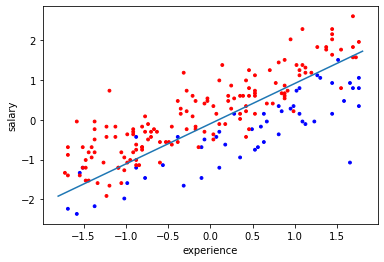

In [15]:
color = ['r' if y_ == 0 else 'b' for y_ in y]
plt.scatter(df.experience, df.salary, c=color, s=8)

b0 = lm.intercept_[0]
b = lm.coef_[0]

Xdb = [-1.8, 1.8]
ydb = [-(b0+b[0]*x)/b[1] for x in Xdb]
plt.plot(Xdb, ydb)
plt.xlabel('experience')
plt.ylabel('salary')


## Increasing dimensionality to improve separation

Here we have a one-dimensional dataset, so our decision boundary is 

$\beta_0 + \beta_1\text{x} = 0$

$\text{x} = \frac{-\beta_0}{\beta_1}$

<ipython-input-19-ede891048513>:25: RuntimeWarning: divide by zero encountered in double_scalars
  db = -b0 / b1


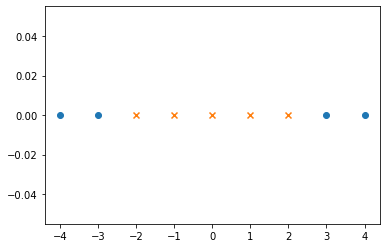

In [19]:
X = [-4, -3, -2, -1, 0, 1, 2, 3, 4]

# We can get a nice decision boundary for this dataset...
# y = [1, 1, 1, 1, 1, 0, 0, 0, 0]

# ...but not for this one
y = [0, 0, 1, 1, 1, 1, 1, 0, 0]

Xy = list(zip(X, y))
zeros = [xy for xy in Xy if xy[1] == 0]
(Xzeros, yzeros) = list(zip(*zeros))
ones = [xy for xy in Xy if xy[1] == 1]
(Xones, yones) = list(zip(*ones))

plt.scatter(Xzeros, [0 for _ in Xzeros], marker='o')
plt.scatter(Xones, [0 for _ in Xones], marker='x')

lm = LogisticRegression()
lm.fit([[x] for x in X], y)

b0 = lm.intercept_[0]
b1 = lm.coef_[0][0]

# Draw the decision boundary
db = -b0 / b1
plt.plot([db, db], [-1, 1])


So we map the dataset into two dimensions and map the second dimension as ```x**2```. This is called the *kernel trick*.

(-1.0, 17.0)

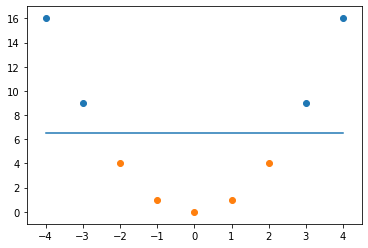

In [20]:
X = [-4, -3, -2, -1, 0, 1, 2, 3, 4]
X = [[x, x**2] for x in X]

# We can get a nice decision boundary for this dataset...
# y = [1, 1, 1, 1, 1, 0, 0, 0, 0]

# ...and for this one
y = [0, 0, 1, 1, 1, 1, 1, 0, 0]

Xy = list(zip(X, y))
zeros = [xy for xy in Xy if xy[1] == 0]
(Xzeros, yzeros) = list(zip(*zeros))
ones = [xy for xy in Xy if xy[1] == 1]
(Xones, yones) = list(zip(*ones))

(xzeros_p, yzeros_p) = zip(*Xzeros)
(xones_p, yones_p) = zip(*Xones)
plt.scatter(xzeros_p, yzeros_p, marker='o')
plt.scatter(xones_p, yones_p, marker='o')

lm = LogisticRegression()
lm.fit(X, y)

b0 = lm.intercept_[0]
b = lm.coef_[0]

# Draw the decision boundary
Xdb = [-4, 4]
ydb = [-(b0+b[0]*x)/b[1] for x in Xdb]
plt.plot(Xdb, ydb)
plt.xlim([-4.5, 4.5])
plt.ylim([-1, 17])
